In [4]:
def prepare_input(image):
    image = image.copy()

    # 归一化
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    image -= means
    image /= stds

    image = np.ascontiguousarray(np.transpose(image, (2, 0, 1)))  # channel first
    image = image[np.newaxis, ...]  # 增加batch维

    return torch.tensor(image, requires_grad=True)

In [5]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

In [6]:
def prepare_input_i(image):
    image = image.copy()
#     image = np.ascontiguousarray(np.transpose(image, (2, 0, 1)))

    # 归一化
#     means = np.array([0.485, 0.456, 0.406])
#     stds = np.array([0.229, 0.224, 0.225])
#     image -= means
#     image /= stds
#     image = np.ascontiguousarray(np.transpose(image, (2, 0, 1)))  # channel first


    return image

In [45]:
in__ = 'H:\\dataset\\binary\\test\\Covid\\Covid_098.jpeg'
in__ = 'H:\\dataset\\binary\\test\\Covid\\Covid_094.jpeg'
target = 0
# in__ = 'H:\\dataset\\binary\\test\\Normal\\Normal_02.jpeg'
# target = 1

In [46]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [47]:
import torch
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
method = 'gradcam'
# model_path = 'H:\\weights\\binary\\20210411115646\\39.pt'
# model_path = r'C:\Users\veere\Downloads\best_model (1).pt'
model_path = r'G:\softwarelife\LJMU\thesis\code\weights\multi_csp121_44.pt'
model = torch.load(model_path)

target_layer = model.features.norm5#denseblock4.denselayer32

In [49]:
model

Csp_DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _Csp_DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [64]:
target_layer = model.classifier

In [62]:
target_layer = model.features.denseblock1.denselayer5

In [50]:
img = io.imread(in__)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs = prepare_input(img)
image_dict = {}

In [51]:
img = io.imread(in__)
img = np.float32(cv2.resize(img, (224, 224))) / 255
inputs_ = prepare_input_i(img)


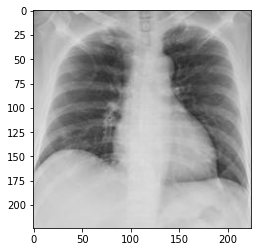

In [52]:
plt.imshow(inputs_)#in__ = 'H:\\dataset\\binary\\test\\Normal\\covid.jpeg'

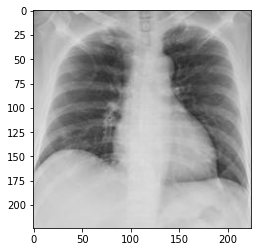

In [53]:
plt.imshow(inputs_)#in__ = 'H:\\dataset\\binary\\test\\Normal\\Normal_02.jpeg'

In [54]:
target_layer = model.features.denseblock4.transition


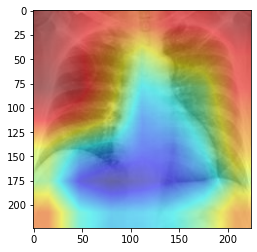

In [67]:

grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)#normal in__ = 'H:\\dataset\\binary\\test\\Normal\\Normal_02.jpeg'

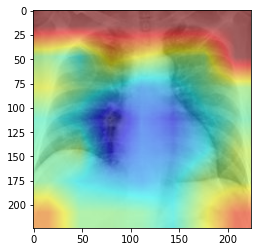

In [57]:
target_layer = model.features.denseblock4.denselayer16
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)#normal in__ = 'covid

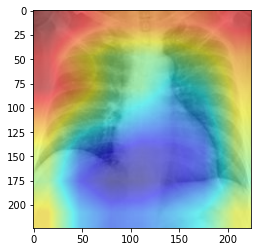

In [58]:
target_layer = model.features.denseblock4.transition
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

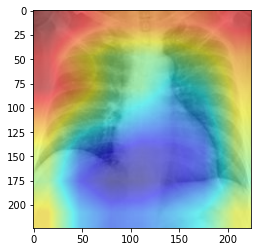

In [59]:
target_layer = model.features.denseblock4.transition
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

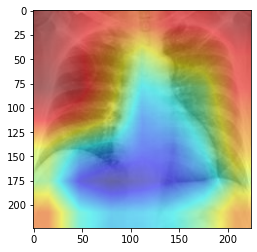

In [60]:
target_layer = model.features.norm5
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

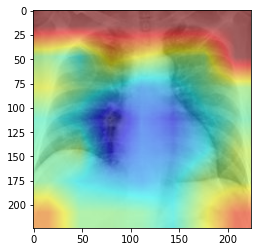

In [61]:
target_layer = model.features.denseblock4.denselayer16
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=target)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

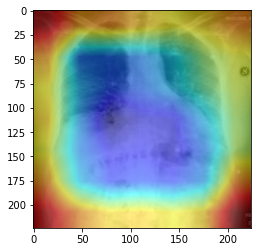

In [37]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
grad_cam = GradCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=0)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

C:\Users\veere\.conda\envs\py37\lib\site-packages\pytorch_grad_cam\base_cam.py:54: RuntimeWarning: invalid value encountered in true_divide
  cam = cam / np.max(cam)


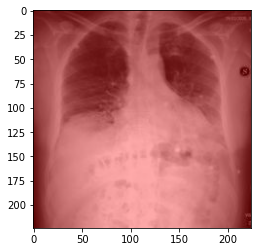

In [38]:
grad_cam = ScoreCAM(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=0)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

In [18]:
grad_cam = ScoreCAM(model, target_layer, use_cuda='use-cuda')
grad_cam

In [16]:
grayscale_cam

array([[0.00802029, 0.00802029, 0.00802029, ..., 0.        , 0.        ,
        0.        ],
       [0.00802029, 0.00802029, 0.00802029, ..., 0.        , 0.        ,
        0.        ],
       [0.00802029, 0.00802029, 0.00802029, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.3169712 , 0.3169712 , 0.3169712 , ..., 0.15612991, 0.15612991,
        0.15612991],
       [0.3169712 , 0.3169712 , 0.3169712 , ..., 0.15612991, 0.15612991,
        0.15612991],
       [0.3169712 , 0.3169712 , 0.3169712 , ..., 0.15612991, 0.15612991,
        0.15612991]], dtype=float32)

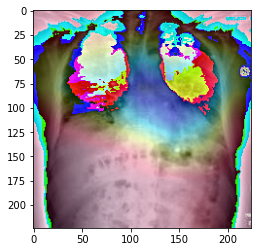

In [17]:
grad_cam = GradCAMPlusPlus(model, target_layer, use_cuda='use-cuda')
grayscale_cam = grad_cam(input_tensor=inputs, target_category=0)
visualization = show_cam_on_image(inputs_, grayscale_cam)
plt.imshow(visualization)

TypeError: Invalid shape (1, 3, 224, 224) for image data

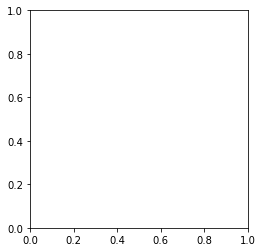

In [83]:
plt.imshow(inputs.detach().numpy())